In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.drop(["PassengerId","Ticket","Fare","Cabin","Name"],axis=1, inplace=True)

In [9]:
emb = pd.get_dummies(df.Embarked, prefix = "EMB")
data = df.join(emb)
data.drop(["Embarked"],axis=1, inplace=True)

In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,EMB_C,EMB_Q,EMB_S
0,0,3,male,22.0,1,0,0,0,1
1,1,1,female,38.0,1,0,1,0,0
2,1,3,female,26.0,0,0,0,0,1
3,1,1,female,35.0,1,0,0,0,1
4,0,3,male,35.0,0,0,0,0,1


In [11]:
data.Sex = data.Sex.map({'male':0, 'female':1})

In [12]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
EMB_C         0
EMB_Q         0
EMB_S         0
dtype: int64

In [13]:
data.Age.fillna(data.Age.mean(), inplace = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   EMB_C     891 non-null    uint8  
 7   EMB_Q     891 non-null    uint8  
 8   EMB_S     891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 44.5 KB


In [15]:
print(df.groupby("Sex")[["Survived","Age"]].mean())



        Survived        Age
Sex                        
female  0.742038  27.915709
male    0.188908  30.726645


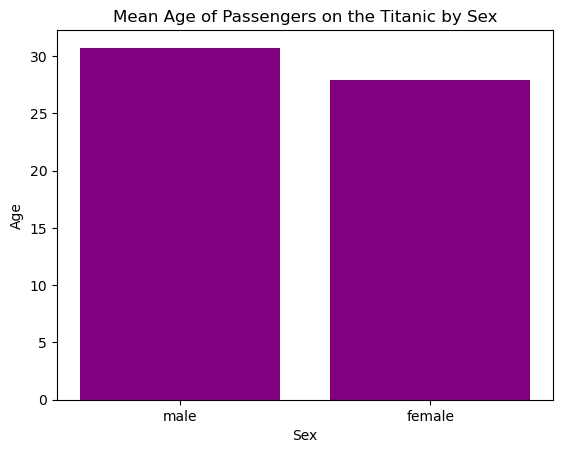

In [16]:
sex = df['Sex']
age = df['Age']

# Create a dictionary to store the mean age of each sex
mean_age = {}
for s in sex.unique():
    mean_age[s] = age[sex == s].mean()

# Create a bar chart of the mean age of each sex
plt.bar(mean_age.keys(), mean_age.values(), color="purple")
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Mean Age of Passengers on the Titanic by Sex')
plt.show()

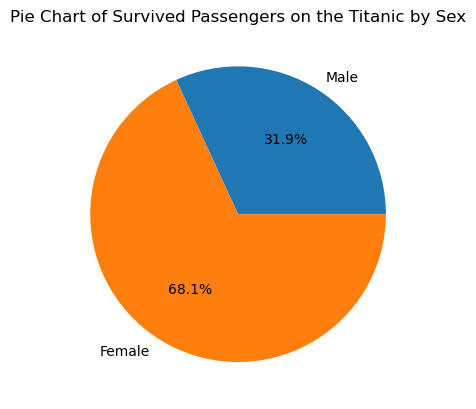

In [17]:
survived = df['Survived']

# Count the number of male and female passengers who survived
n_male_survived = survived[sex == 'male'].sum()
n_female_survived = survived[sex == 'female'].sum()

# Create a pie chart of the number of male and female passengers who survived
plt.pie([n_male_survived, n_female_survived], labels=['Male', 'Female'], autopct='%.1f%%')
plt.title('Pie Chart of Survived Passengers on the Titanic by Sex')
plt.show()

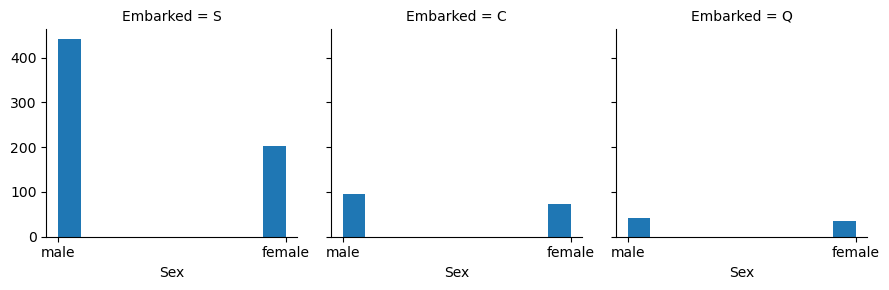

In [28]:
g = sns.FacetGrid(df, col="Embarked")
g = g.map(plt.hist, "Sex")

In [18]:
y = data.iloc[:,0]
x = data.iloc[:,1:]

In [19]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,EMB_C,EMB_Q,EMB_S
0,3,0,22.0,1,0,0,0,1
1,1,1,38.0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,3,0,35.0,0,0,0,0,1


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [32]:
#LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred1 = logisticRegr.predict(x_test)

C:\Users\LAIBA\Documents\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
accuracy1 = accuracy_score(y_test ,y_pred1)
accuracy1

0.7988826815642458

In [30]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred2 = svc.predict(x_test)

In [31]:
accuracy2 = accuracy_score(y_test ,y_pred2)
accuracy2

0.6424581005586593

In [35]:
#KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred3 = knn.predict(x_test)

In [36]:
accuracy3 = accuracy_score(y_test ,y_pred3)
accuracy3

0.7653631284916201

In [37]:
# Decision Tree

decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
y_pred4 = decision.predict(x_test)

In [38]:
accuracy4 = accuracy_score(y_test ,y_pred4)
accuracy4

0.7932960893854749

In [39]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred5 = random_forest.predict(x_test)

In [40]:
accuracy5 = accuracy_score(y_test ,y_pred5)
accuracy5

0.8044692737430168

In [46]:
print("-----Accuracy of different models-----")
print("LogisticRegression: ","{:.2f}".format(accuracy1))
print("Support Vector Machines: ","{:.2f}".format(accuracy2))
print("KNeighborsClassifier: ","{:.2f}".format(accuracy3))
print("Decision Tree: ","{:.2f}".format(accuracy4))
print("Random Forest: ","{:.2f}".format(accuracy5))

-----Accuracy of different models-----
LogisticRegression:  0.80
Support Vector Machines:  0.64
KNeighborsClassifier:  0.77
Decision Tree:  0.79
Random Forest:  0.80
